# Tree Ensemble

> A decision tree ensemble implementation (see: http://course18.fast.ai).

The main goals for this project are to;
- learn how to write a tree ensemble and some interpretation functions
- have a realistic project to learn nbdev and try things like converting nbdev flags to magics (https://forums.fast.ai/t/can-we-have-tab-completion-and-help-for-nbdev-flags/)

## Install

I don't think we want to create a pip install for this project ... if you're looking for a production ready tree ensemble/random forest, you really should use https://scikit-learn.org/ instead (o:

## How to use

In [ ]:
#hide
from decision_tree.imports import *
from decision_tree.core import *
from decision_tree.data import *
from decision_tree.models import *

import matplotlib.pyplot as plt

Load data copied from the final model used in https://github.com/fastai/fastai/tree/master/courses/ml1/lesson2-rf_interpretation.ipynb

In [ ]:
bulldozers_data = np.load('test/data/bulldozers.npy', allow_pickle=True)
train_data = DataWrapper(*bulldozers_data[:4])
valid_data = DataWrapper(*bulldozers_data[4:])
train_data, valid_data

(DataWrapper(x:['YearMade' 'Coupler_System' 'ProductSize' 'fiProductClassDesc' 'ModelID'
  'saleElapsed' 'fiSecondaryDesc' 'fiModelDesc' 'Enclosure'
  'fiModelDescriptor' 'Hydraulics_Flow' 'Drive_System' 'ProductGroup'
  'Track_Type' 'state' 'saleDay' 'ProductGroupDesc' 'age'] y:SalePrice, len:389125),
 DataWrapper(x:['YearMade' 'Coupler_System' 'ProductSize' 'fiProductClassDesc' 'ModelID'
  'saleElapsed' 'fiSecondaryDesc' 'fiModelDesc' 'Enclosure'
  'fiModelDescriptor' 'Hydraulics_Flow' 'Drive_System' 'ProductGroup'
  'Track_Type' 'state' 'saleDay' 'ProductGroupDesc' 'age'] y:SalePrice, len:12000))

In [ ]:
def time_fit(n_rows, sample_size=1500, n_trees=10):
    data = train_data.tail(int(n_rows))
    if sample_size<1: sample_size=int(n_rows*sample_size)
    m = TreeEnsemble(data, sample_size=sample_size, n_trees=n_trees, min_leaf_samples=5)
    %time m.fit()
    print('\n', m, '\n')
    test_preds = m.predict(valid_data.x)
    loss = rmse(test_preds, valid_data.y); print('loss', loss)
    plt.scatter(test_preds, valid_data.y, alpha=.1);

CPU times: user 135 ms, sys: 61.9 ms, total: 197 ms
Wall time: 2.6 s

 tEnsemble(data=DataWrapper(x:['YearMade' 'Coupler_System' 'ProductSize' 'fiProductClassDesc' 'ModelID'
 'saleElapsed' 'fiSecondaryDesc' 'fiModelDesc' 'Enclosure'
 'fiModelDescriptor' 'Hydraulics_Flow' 'Drive_System' 'ProductGroup'
 'Track_Type' 'state' 'saleDay' 'ProductGroupDesc' 'age'] y:SalePrice, len:10000) n_trees=50 sample_size=750 max_depth=None min_leaf_samples=5) 

loss 0.4471480191331508


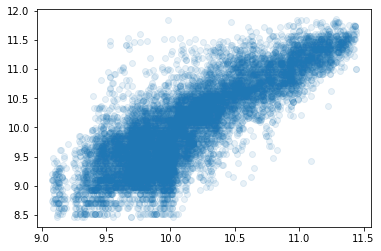

In [ ]:
time_fit(1e4, 750, n_trees=50)

CPU times: user 9.28 ms, sys: 64.3 ms, total: 73.6 ms
Wall time: 570 ms

 tEnsemble(data=DataWrapper(x:['YearMade' 'Coupler_System' 'ProductSize' 'fiProductClassDesc' 'ModelID'
 'saleElapsed' 'fiSecondaryDesc' 'fiModelDesc' 'Enclosure'
 'fiModelDescriptor' 'Hydraulics_Flow' 'Drive_System' 'ProductGroup'
 'Track_Type' 'state' 'saleDay' 'ProductGroupDesc' 'age'] y:SalePrice, len:3125) n_trees=10 sample_size=750 max_depth=None min_leaf_samples=5) 

loss 0.5810256238591021


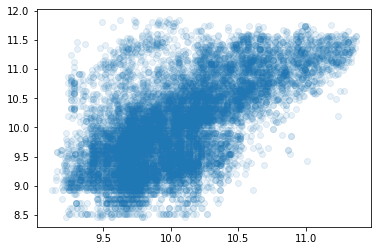

In [ ]:
time_fit(3125, 750)

# Decision Tree dev project set-up

You can create a `decision_tree` anaconda enviroment with the following;
<pre>
conda create -n decision_tree python=3.7 -y
conda activate decision_tree
pip install nbdev
pip install pandas
pip install matplotlib
</pre>

Note: If you want to use this project to try out changes to the nbdev project, use an editable nbdev install. i.e. git clone nbdev then, `pip install -e nbdev` - assuming you are in the parent folder of nbdev.

## git commands

### Show local changes
`git status`

`git diff`

### Stage all changes 
`git add -A`

### Commmit all staged changes
`git commit -m "message"`

### Push changes to github
`git push`

### Pull upstream changes
https://github.com/KirstieJane/STEMMRoleModels/wiki/Syncing-your-fork-to-the-original-repository-via-the-browser

In [ ]:
#hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 10_data.ipynb.
Converted 20_models.ipynb.
Converted 30_test_flag.ipynb.
Converted 40_test_export.ipynb.
Converted 50_test_doc.ipynb.
Converted 60_all_test.ipynb.
Converted index.ipynb.


I was hoping to do a run on all of this data - but it's too slow unless we use a sub-set

using prun while training a single DecisionTree tells us;
<pre>
18998653 function calls (18972487 primitive calls) in 18.418 seconds

   Ordered by: internal time
  
   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  8478750    5.034    0.000    5.034    0.000 core.py:28(upd)
   261670    4.998    0.000   17.480    0.000 models.py:23(best_split_for_col)
   645756    1.337    0.000    1.337    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   915106    1.224    0.000    2.384    0.000 core.py:21(agg_std)
   915106    0.828    0.000    1.160    0.000 core.py:20(agg_var)
   261670    0.579    0.000    0.579    0.000 data.py:73(get_sample)
</pre>

This is too slow to be of any use - we need to be able to train with ~half a millon rows in ~30 seconds

| n_trees/sample_size | number of rows used in training | Wall time |
|---------------------|---------------------------------|-----------|
| 10/1500             | 1e4                             | 1.93 s    |
| 10/20%              | 4e4                             | 10.4 s    |
| 10/20%              | 1e5                             | 26.5 s    |
| 10/1500             | 4e4                             | 1.87 s    |

it takes ~3s to train a single tree on 10000 rows

# nbdev testing

## hide output/input

In [ ]:
#hide_output
print('output should be hidden: hide_output')

output should be hidden: hide_output


In [ ]:
#hide-output
print('output should be hidden: hide-output')

output should be hidden: hide-output


In [ ]:
#hide_input
print('input should be hidden: hide_input')

input should be hidden: hide_input


In [ ]:
#hide-input
print('input should be hidden: hide-input')

input should be hidden: hide-input


## collapse

In [ ]:
#collapse
print('collapse')

collapse


In [ ]:
#collapse_show
print('collapse_show')

collapse_show


In [ ]:
#collapse-show
print('collapse-show')

collapse-show


In [ ]:
#collapse_hide
print('collapse_hide')

collapse_hide


In [ ]:
#collapse-hide
print('collapse-hide')

collapse-hide


In [ ]:
#collapse_output
print('collapse_output')

collapse_output


In [ ]:
#collapse-output
print('collapse-output')

collapse-output
